In [2]:
# import onadata package
import onadata as ona
import pandas as pd
import networkx as nx
from cdlib import algorithms
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt 

edgelist = ona.email_edgelist()
vertices = ona.email_vertices()

# criando grafo a partir de pandas Dataframe
graph = nx.from_pandas_edgelist(edgelist, 
source = 'from', target = 'to')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [3]:
#Componentes conectados
# Encontrar os componentes conectados
componentes_conectados = list(nx.connected_components(graph))

print("Componentes conectados:", len(componentes_conectados))

Componentes conectados: 1


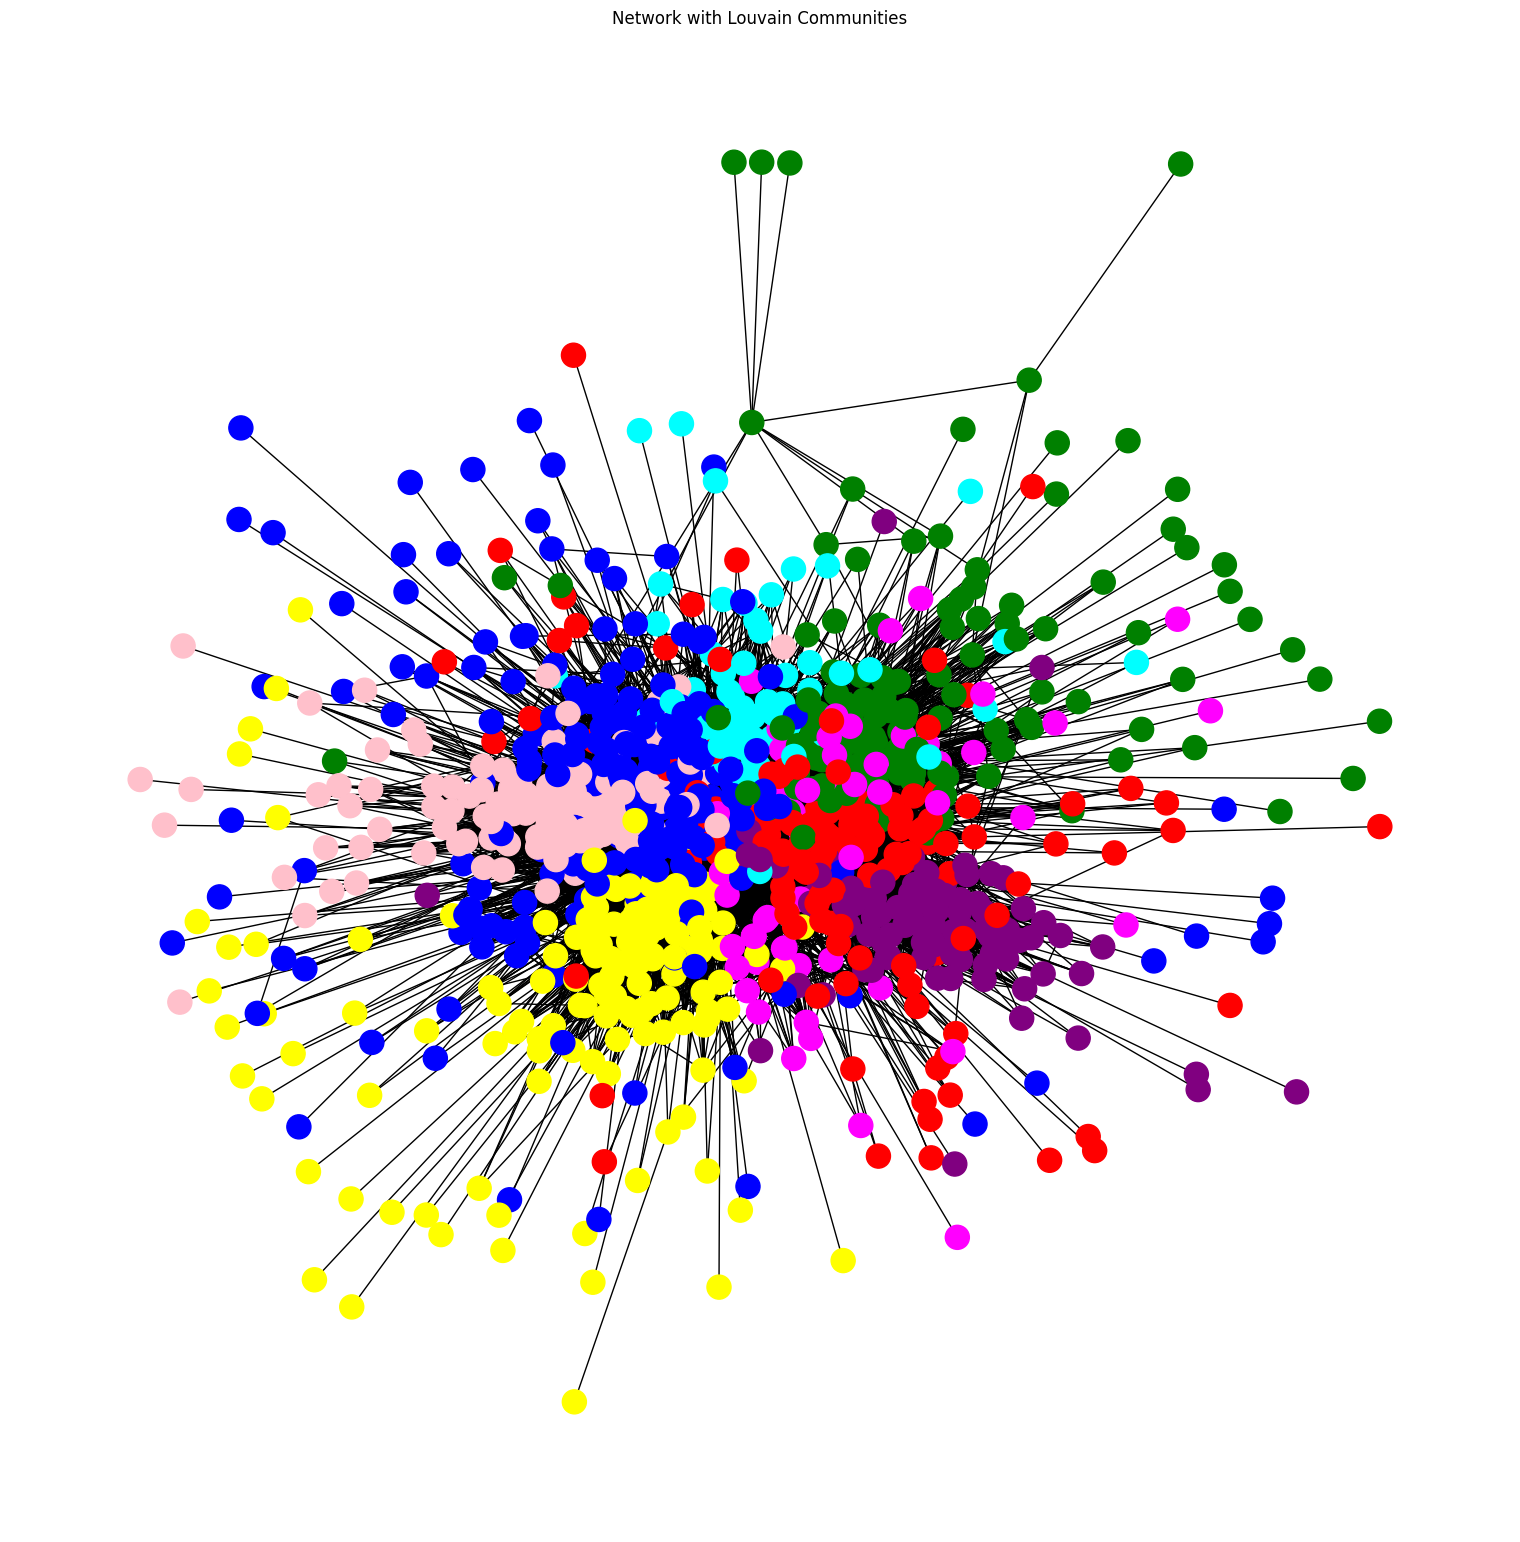

In [4]:
# Partição Louvain que optimiza a modularidade
louvain_comms = algorithms.louvain(graph)

# convertendo a comunidade louvain para dicionario(colorir)
community_dict = {}
for idx, community in enumerate(louvain_comms.communities):
    for node in community:
        community_dict[node] = idx

# cores para cada comunidade
node_colors = [community_dict[node] for node in graph.nodes()]
cores = ['blue' if x == 0 else
         'yellow' if x == 1 else
         'red' if x == 2 else
         'green' if x == 3 else
         'pink' if x == 4 else
         'purple' if x == 5 else
         'cyan' if x == 6 else
         'magenta' for x in node_colors]

# Desenhando o grafo com as cores
plt.figure(figsize=(15, 15))
np.random.seed(123)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=cores, with_labels=False)
plt.title("Network with Louvain Communities")
plt.show()

In [32]:
louvain_comms.newman_girvan_modularity()

FitnessResult(min=None, max=None, score=0.41621670842774317, std=None)

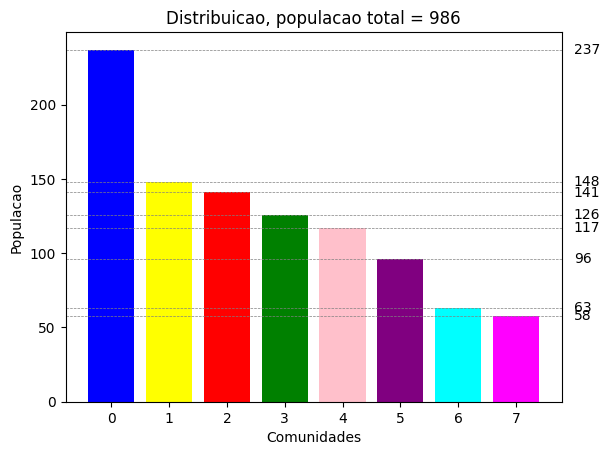

In [5]:
louvain_comms.communities
community_colors = ['blue', 'yellow', 'red', 'green', 'pink', 'purple', 'cyan', 'magenta']
listx = []
listy = []
cont = 0
for x, y in enumerate(louvain_comms.communities):
    listx.append(x)
    listy.append(len(y))
    cont += len(y)
    
plt.title("Distribuicao, populacao total = "+ str(cont))
plt.xlabel("Comunidades")
plt.ylabel("Populacao")

# Adicionar linhas auxiliares para as alturas das barras
for category, value in zip(listx, listy):
    plt.axhline(y=value, color='gray', linestyle='--', linewidth=0.5)
    plt.text(len(listy), value, str(value), va='center', ha='left')
plt.bar(listx , listy,color = community_colors)
plt.show()

In [6]:
plt.close()

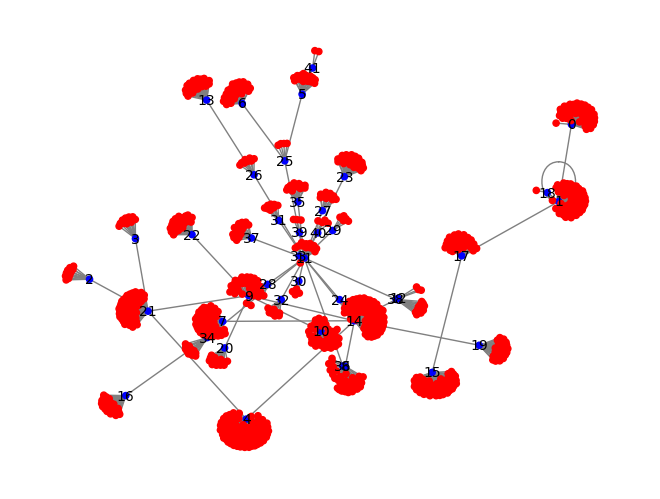

In [7]:
# Supondo que você tenha os dados em dois arrays ou séries chamados "id" e "dept"
id = vertices["id"]
dept = vertices["dept"]

# Inicializar o dicionário
dict_dept = {}

# Iterar sobre os departamentos e IDs
for i, x in enumerate(dept):
    if x in dict_dept:
        dict_dept[x].append(id[i])
    else:
        dict_dept[x] = [id[i]]

# Criar o grafo a partir do dicionário
graph = nx.Graph(dict_dept)

# Criar uma lista de cores para os nós
cores = ['blue' if node in dept.values else 'red' for node in graph.nodes()]

# Plotar o grafo com rótulos nos nós correspondentes aos departamentos
np.random.seed(123)
pos = nx.spring_layout(graph)  # Layout para posicionar os nós
nx.draw(graph, pos, with_labels=False, node_color=cores, node_size=20, edge_color='gray')
nx.draw_networkx_labels(graph, pos, labels={node: str(node) for node in range(0, 42)}, font_size=10)  # Adicionar rótulos com números dos departamentos
plt.show()


In [8]:
plt.close()

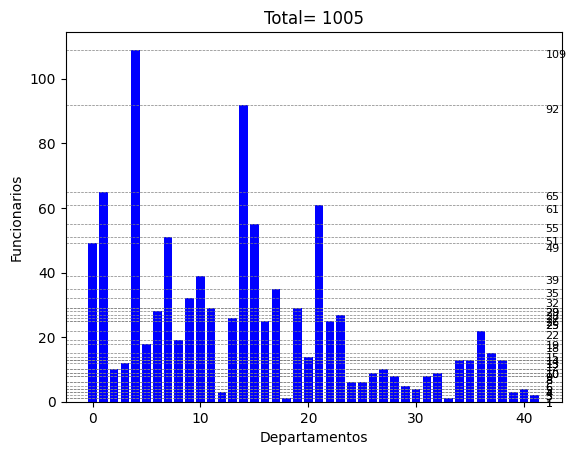

In [9]:
dicionario_ordenado = dict(sorted(dict_dept.items()))
listx = [x for x in dicionario_ordenado]
listy = []
cont = 0
for x in dicionario_ordenado:
    listy.append(len(dicionario_ordenado[x]))
    cont += (len(dicionario_ordenado[x]))
    
plt.title("Total= " + str(cont))
plt.xlabel("Departamentos")
plt.ylabel("Funcionarios")

# Adicionar linhas auxiliares para as alturas das barras
for category, value in zip(listx, listy):
    plt.axhline(y=value, color='gray', linestyle='--', linewidth=0.5)
    plt.text(len(listy), value, str(value), va='top', ha='left', fontsize = 8)
    
plt.bar(listx , listy,color = 'blue')
plt.show()

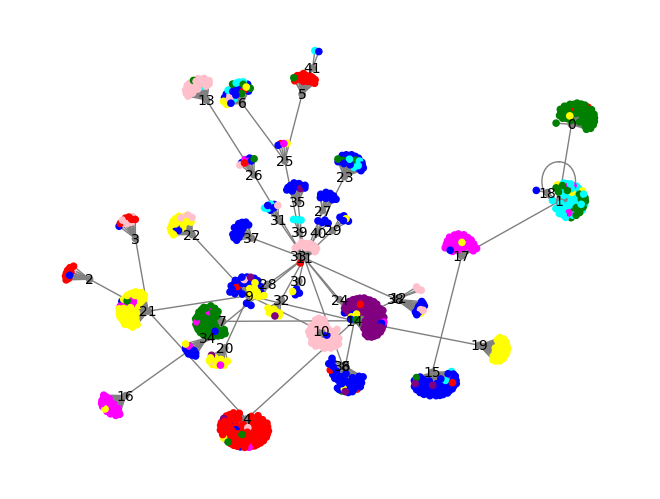

In [10]:
# Criar o grafo a partir do dicionário
graph = nx.Graph(dict_dept)

# Criar uma lista de cores para os nós
cores = ['gray' if node in dept.values else 'blue' if node in louvain_comms.communities[0]
         else 'yellow' if node in louvain_comms.communities[1] 
         else 'red' if node in louvain_comms.communities[2]
         else 'green' if node in louvain_comms.communities[3]
         else 'pink' if node in louvain_comms.communities[4]
         else 'purple' if node in louvain_comms.communities[5]
         else 'cyan' if node in louvain_comms.communities[6]
         else 'magenta' for node in graph.nodes()]

# Plotar o grafo com rótulos nos nós correspondentes aos departamentos
np.random.seed(123)
pos = nx.spring_layout(graph)  # Layout para posicionar os nós
nx.draw(graph, pos, with_labels=False, node_color=cores, node_size=20, edge_color='gray')
nx.draw_networkx_labels(graph, pos, labels={node: str(node) for node in range(0, 42)}, font_size=10)  # Adicionar rótulos com números dos departamentos
plt.show()


In [11]:
blue_community = louvain_comms.communities[0]
blue_percentual = {}
for x in range(42):
    blue_percentual[x] = 0
for x in blue_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            blue_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
blue_percentual = {chave: valor for chave, valor in blue_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(blue_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in blue_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Bluey")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Bluey
    Dept  QuantidadeDePessoas  Porcentagem
0      2                    1     0.421941
1      3                    1     0.421941
2      4                    3     1.265823
3      6                   12     5.063291
4      7                    1     0.421941
5      8                   18     7.594937
6      9                   28    11.814346
7     10                    1     0.421941
8     14                    2     0.843882
9     15                   48    20.253165
10    17                    1     0.421941
11    18                    1     0.421941
12    21                    1     0.421941
13    22                    2     0.843882
14    23                   19     8.016878
15    24                    3     1.265823
16    25                    1     0.421941
17    26                    3     1.265823
18    27                   10     4.219409
19    29                    4     1.687764
20    30                    3     1.265823
21    31                  

In [12]:
yellow_community = louvain_comms.communities[1]
yellow_percentual = {}
for x in range(42):
    yellow_percentual[x] = 0
for x in yellow_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            yellow_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
yellow_percentual = {chave: valor for chave, valor in yellow_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(yellow_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in yellow_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Yellow")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Yellow
    Dept  QuantidadeDePessoas  Porcentagem
0      0                    1     0.675676
1      1                    3     2.027027
2      4                    1     0.675676
3      6                    3     2.027027
4     16                    1     0.675676
5     17                    1     0.675676
6     19                   29    19.594595
7     20                   11     7.432432
8     21                   53    35.810811
9     22                   19    12.837838
10    24                    2     1.351351
11    25                    3     2.027027
12    28                    8     5.405405
13    29                    1     0.675676
14    30                    1     0.675676
15    32                    8     5.405405
16    34                    1     0.675676
17    36                    1     0.675676
18    38                    1     0.675676


In [13]:
red_community = louvain_comms.communities[2]
red_percentual = {}
for x in range(42):
    red_percentual[x] = 0
for x in red_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            red_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
red_percentual = {chave: valor for chave, valor in red_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(red_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in red_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Red")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Red
    Dept  QuantidadeDePessoas  Porcentagem
0      0                    2     1.418440
1      2                    8     5.673759
2      3                    5     3.546099
3      4                   99    70.212766
4      5                   17    12.056738
5      6                    1     0.709220
6      8                    1     0.709220
7      9                    1     0.709220
8     14                    1     0.709220
9     15                    1     0.709220
10    21                    1     0.709220
11    25                    1     0.709220
12    26                    1     0.709220
13    33                    1     0.709220
14    36                    1     0.709220


In [14]:
green_community = louvain_comms.communities[3]
green_percentual = {}
for x in range(42):
    green_percentual[x] = 0
for x in green_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            green_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
green_percentual = {chave: valor for chave, valor in green_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(green_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in green_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Green")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Green
    Dept  QuantidadeDePessoas  Porcentagem
0      0                   46    36.507937
1      1                   16    12.698413
2      4                    2     1.587302
3      5                    1     0.793651
4      6                    4     3.174603
5      7                   48    38.095238
6     13                    1     0.793651
7     15                    1     0.793651
8     21                    1     0.793651
9     23                    3     2.380952
10    24                    1     0.793651
11    26                    1     0.793651
12    36                    1     0.793651


In [15]:
pink_community = louvain_comms.communities[4]
pink_percentual = {}
for x in range(42):
    pink_percentual[x] = 0
for x in pink_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            pink_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
pink_percentual = {chave: valor for chave, valor in pink_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(pink_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in pink_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Pink")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Pink
    Dept  QuantidadeDePessoas  Porcentagem
0      2                    1     0.854701
1      3                    6     5.128205
2      4                    1     0.854701
3      6                    3     2.564103
4      9                    1     0.854701
5     10                   38    32.478632
6     11                   29    24.786325
7     12                    3     2.564103
8     13                   24    20.512821
9     20                    1     0.854701
10    22                    4     3.418803
11    26                    2     1.709402
12    31                    1     0.854701
13    36                    1     0.854701
14    38                    2     1.709402


In [16]:
purple_community = louvain_comms.communities[5]
purple_percentual = {}
for x in range(42):
    purple_percentual[x] = 0
for x in purple_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            purple_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
purple_percentual = {chave: valor for chave, valor in purple_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(purple_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in purple_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Purple")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Purple
   Dept  QuantidadeDePessoas  Porcentagem
0     4                    1     1.041667
1     9                    1     1.041667
2    14                   88    91.666667
3    15                    2     2.083333
4    20                    1     1.041667
5    32                    1     1.041667
6    35                    1     1.041667
7    36                    1     1.041667


In [17]:
cyan_community = louvain_comms.communities[6]
cyan_percentual = {}
for x in range(42):
    cyan_percentual[x] = 0
for x in cyan_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            cyan_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
cyan_percentual = {chave: valor for chave, valor in cyan_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(cyan_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in cyan_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Cyan")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Cyan
   Dept  QuantidadeDePessoas  Porcentagem
0     1                   43    68.253968
1     6                    5     7.936508
2    13                    1     1.587302
3    15                    2     3.174603
4    23                    5     7.936508
5    31                    3     4.761905
6    39                    3     4.761905
7    41                    1     1.587302


In [18]:
magenta_community = louvain_comms.communities[7]
magenta_percentual = {}
for x in range(42):
    magenta_percentual[x] = 0
for x in magenta_community:
    objeto_procurado = x
    for chave, valor in enumerate(dicionario_ordenado.items()):
        if objeto_procurado in dicionario_ordenado[chave]:
            magenta_percentual[chave] += 1
        else:
            pass
# Criar um novo dicionário excluindo as chaves que têm o valor 0 associado
magenta_percentual = {chave: valor for chave, valor in magenta_percentual.items() if valor != 0}

# Calcular a soma de todos os valores associados
soma_total = sum(magenta_percentual.values())

# Calcular a porcentagem e o peso de cada chave
data = []
for chave, valor in magenta_percentual.items():
    porcentagem = (valor / soma_total) * 100
    data.append([chave, valor, porcentagem])

# Criar o DataFrame
print("           Comunidade Magenta")
df = pd.DataFrame(data, columns=['Dept', 'QuantidadeDePessoas', 'Porcentagem'])
print(df)

           Comunidade Magenta
   Dept  QuantidadeDePessoas  Porcentagem
0    16                   23    39.655172
1    17                   32    55.172414
2    25                    1     1.724138
3    26                    2     3.448276


In [19]:
graph = nx.from_pandas_edgelist(edgelist, 
source = 'from', target = 'to')
cliques = nx.find_cliques(graph)
maximal_cliques = sorted(cliques, key = len)


In [20]:
#Maior clique
cliques = maximal_cliques[len(maximal_cliques) - 1]
print("O grafo tem " + str(len(maximal_cliques)) + " cliques maximais")
print("O maior clique tem tamanho " + str(len(cliques)))

O grafo tem 42709 cliques maximais
O maior clique tem tamanho 18


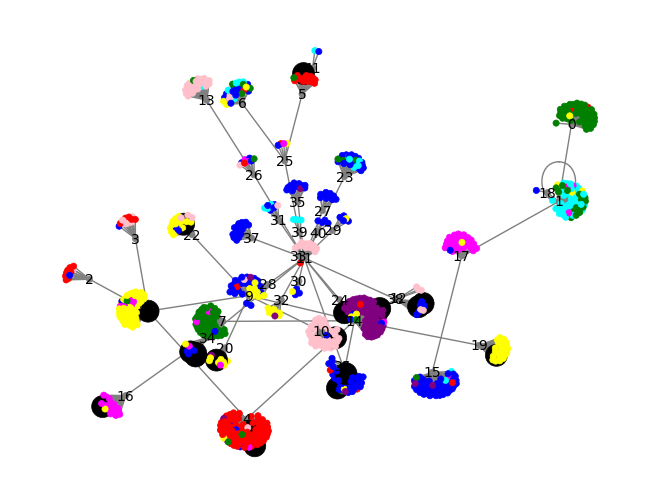

In [21]:
# Criar o grafo a partir do dicionário
graph = nx.Graph(dict_dept)

# Criar uma lista de cores para os nós
cores = ['black' if node in cliques
         else 'gray' if node in dept.values 
         else 'blue' if node in louvain_comms.communities[0]
         else 'yellow' if node in louvain_comms.communities[1] 
         else 'red' if node in louvain_comms.communities[2]
         else 'green' if node in louvain_comms.communities[3]
         else 'pink' if node in louvain_comms.communities[4]
         else 'purple' if node in louvain_comms.communities[5]
         else 'cyan' if node in louvain_comms.communities[6]
         else 'magenta' for node in graph.nodes()]

# Plotar o grafo com rótulos nos nós correspondentes aos departamentos
np.random.seed(123)
node_size = [250 if cor == 'black' else 20 for cor in cores]

# Desenhar o grafo com os ajustes de tamanho e borda
nx.draw(graph, pos, with_labels=False, node_color=cores, node_size=node_size, edge_color='gray', linewidths=0.5, width=1.0)

# Adicionar rótulos com números dos departamentos
nx.draw_networkx_labels(graph, pos, labels={node: str(node) for node in range(0, 42)}, font_size=10)
plt.show()

In [33]:
from cdlib import algorithms
graph = nx.from_pandas_edgelist(edgelist, 
source = 'from', target = 'to')

# Aplicar o algoritmo Leiden
leiden = algorithms.leiden(graph)

for ind, comm in enumerate(leiden.communities):
    print(str(ind) + ": " + str(len(comm)))

0: 314
1: 144
2: 134
3: 130
4: 111
5: 97
6: 56


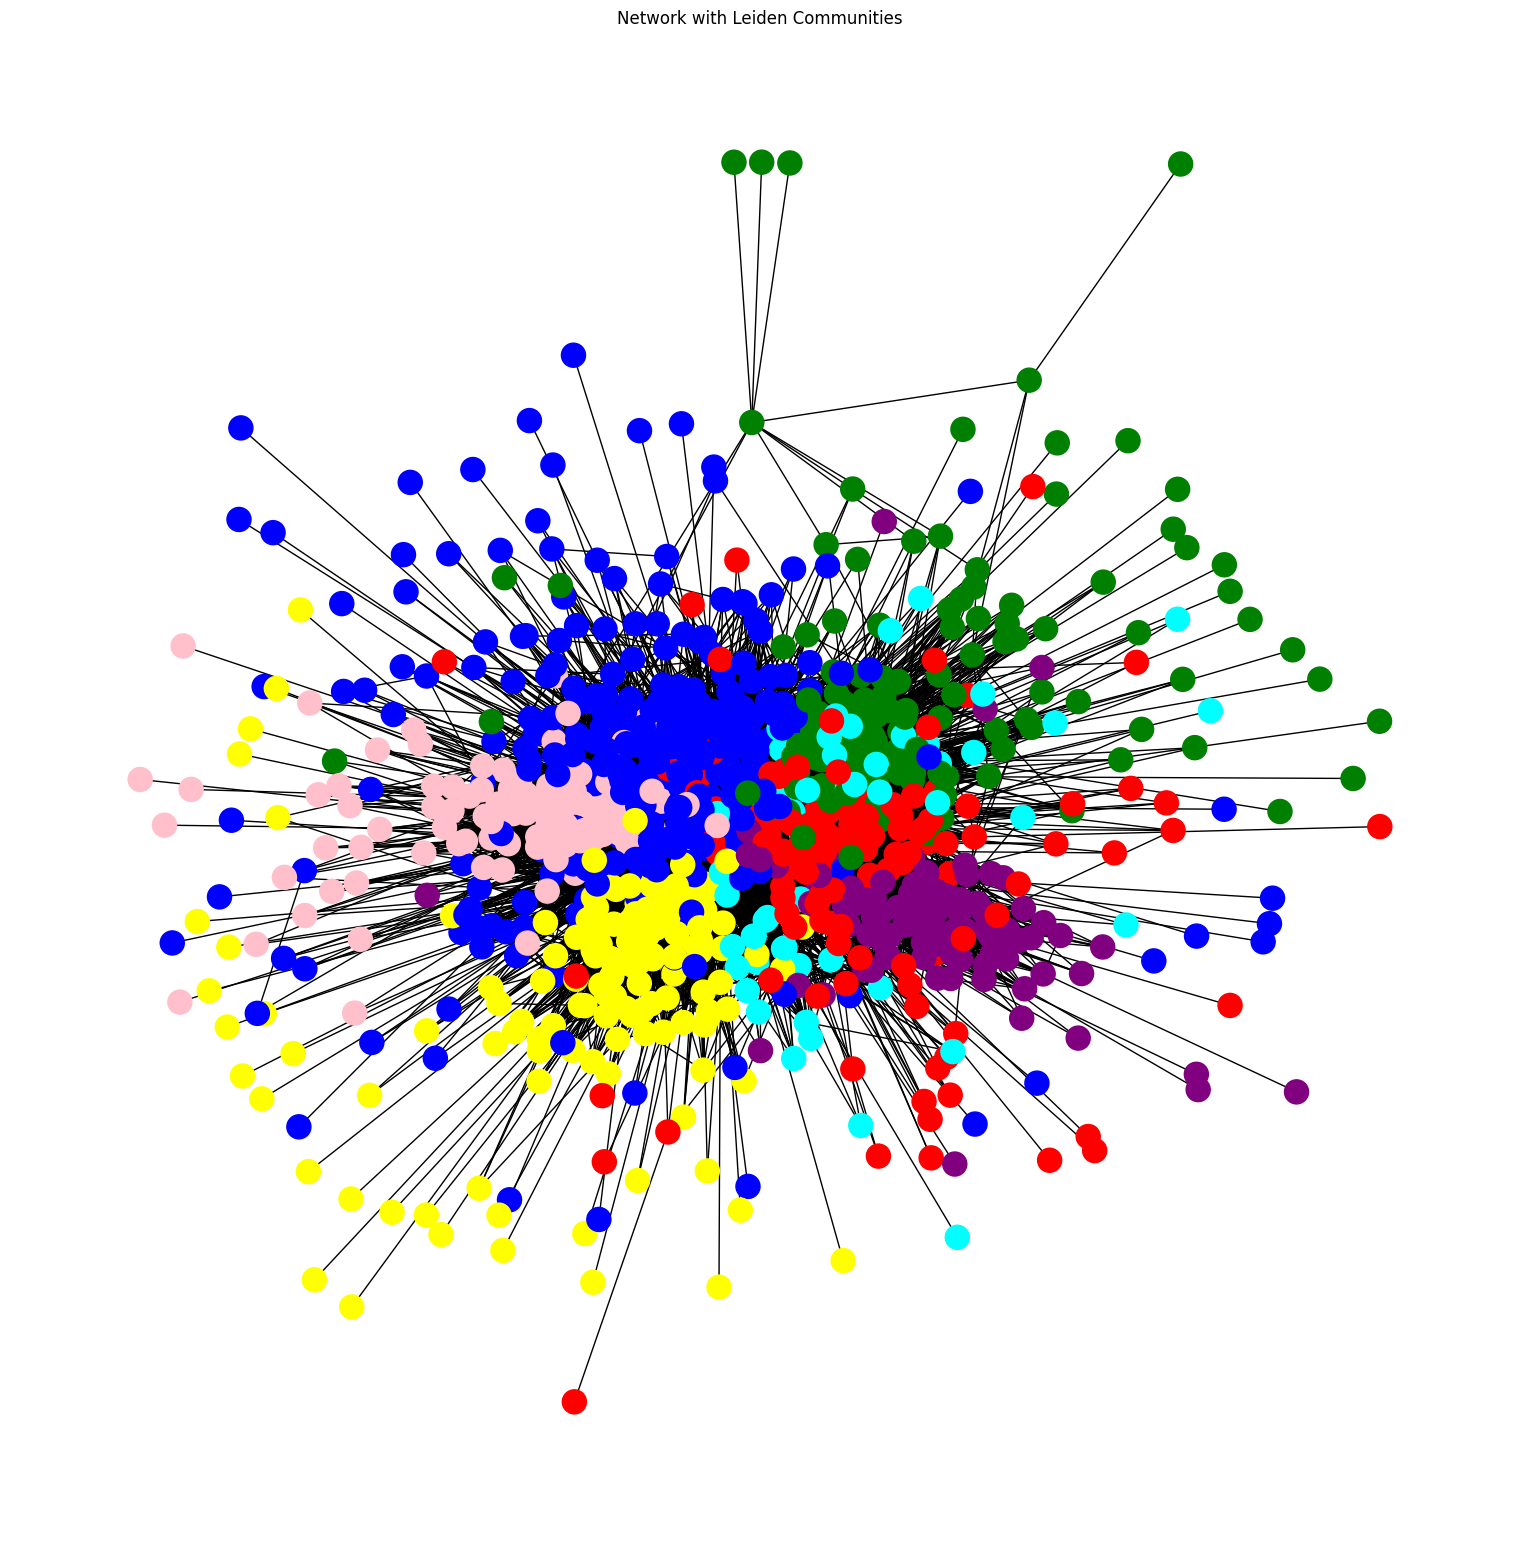

In [35]:
community_dict = {}
for idx, community in enumerate(leiden.communities):
    for node in community:
        community_dict[node] = idx

# cores para cada comunidade
node_colors = [community_dict[node] for node in graph.nodes()]
cores = ['blue' if x == 0 else
         'yellow' if x == 1 else
         'red' if x == 2 else
         'green' if x == 3 else
         'pink' if x == 4 else
         'purple' if x == 5 else
         'cyan' if x == 6 else
         'magenta' for x in node_colors]

# Desenhando o grafo com as cores
plt.figure(figsize=(15, 15))
np.random.seed(123)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color=cores, with_labels=False)
plt.title("Network with Leiden Communities")
plt.show()

In [36]:
leiden.newman_girvan_modularity()

FitnessResult(min=None, max=None, score=0.41737940969873, std=None)

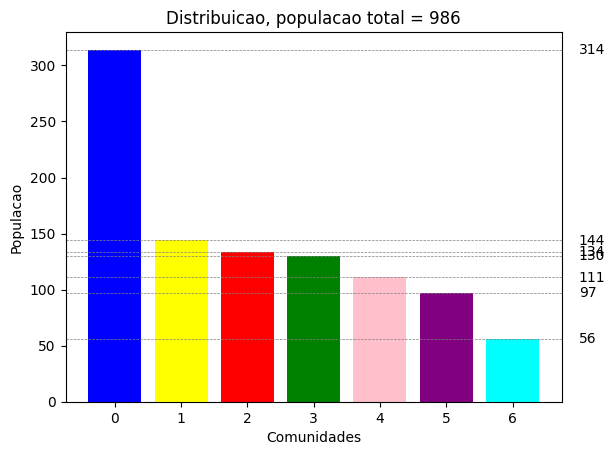

In [37]:
community_colors = ['blue', 'yellow', 'red', 'green', 'pink', 'purple', 'cyan']
listx = []
listy = []
cont = 0
for x, y in enumerate(leiden.communities):
    listx.append(x)
    listy.append(len(y))
    cont += len(y)
    
plt.title("Distribuicao, populacao total = "+ str(cont))
plt.xlabel("Comunidades")
plt.ylabel("Populacao")

# Adicionar linhas auxiliares para as alturas das barras
for category, value in zip(listx, listy):
    plt.axhline(y=value, color='gray', linestyle='--', linewidth=0.5)
    plt.text(len(listy), value, str(value), va='center', ha='left')
plt.bar(listx , listy,color = community_colors)
plt.show()